# Demo: Using VGG with Keras

Below, you'll be able to check out the predictions from an ImageNet pre-trained VGG network with Keras.

### Load some example images

['images/dog_labrador.jpg', 'images/baca.jpg', 'images/zebra.jpg', 'images/owczarke.jpg', 'images/elephant.jpg']


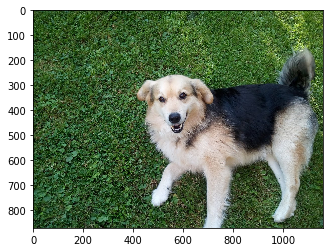

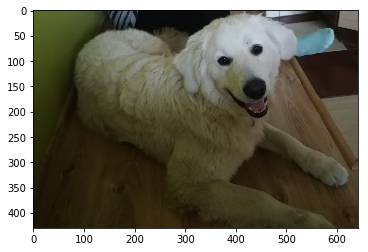

In [1]:
# Load our images first, and we'll check what we have
from glob import glob
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline

image_paths = glob('images/*.jpg')

# Print out the image paths
print(image_paths)

# Store paths for later
baca_path = image_paths[1]
tajfun_path = image_paths[3]

# View dogos images:
baca_path = image_paths[1]
img = mpimg.imread(baca_path)
plt.imshow(img)
plt.show()

img = mpimg.imread(tajfun_path)
plt.imshow(img)
plt.show()

# utility for owczrek podhalański
tatra_sheep_dog_name = 'Polish_Tatra_Sheepdog'
dog_name_converter = {'kuvasz':tatra_sheep_dog_name,
                      'Old_English_sheepdog':tatra_sheep_dog_name, 
                      'Great_Pyrenees': tatra_sheep_dog_name}

### Pre-process an image
Note that the `image.load_img()` function will re-size our image to 224x224 as desired for input into this VGG16 model, so the images themselves don't have to be 224x224 to start.

In [2]:
# Here, we'll load an image and pre-process it
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
import numpy as np

img_paths = [baca_path, tajfun_path]
inputs = []

for img_path in img_paths:  
    img = image.load_img(img_path, target_size=(224, 224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    inputs.append(x)

Using TensorFlow backend.


### Load VGG16 pre-trained model
We won't throw out the top fully-connected layer this time when we load the model, as we actually want the true ImageNet-related output. However, you'll learn how to do this in a later lab. The inference will be a little slower than you might expect here as we are not using GPU just yet.

Note also the use of `decode_predictions` which will map the prediction to the class name.

Predicted: [('n02106662', 'German_shepherd', 0.18318309), ('n02091635', 'otterhound', 0.13887741), ('n02110063', 'malamute', 0.11911383)]
Predicted: [('n02104029', 'kuvasz', 0.65635949), ('n02105641', 'Old_English_sheepdog', 0.13703242), ('n02111500', 'Great_Pyrenees', 0.074491084)]


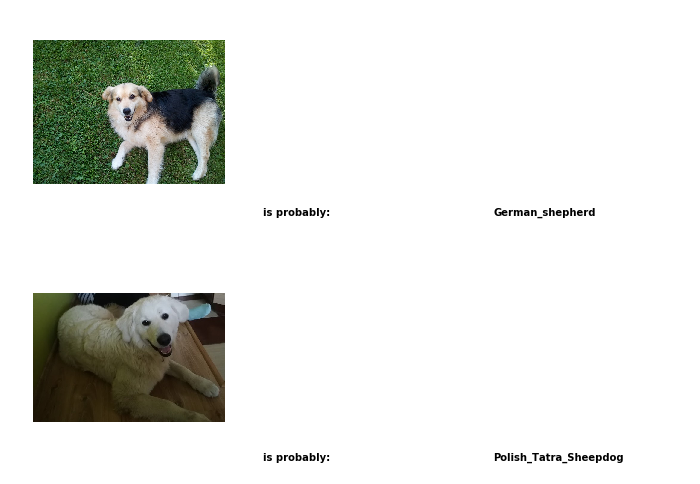

In [3]:
# Note - this will likely need to download a new version of VGG16
from keras.applications.vgg16 import VGG16, decode_predictions

# Load the pre-trained model
model = VGG16(weights='imagenet')


# Prepare plots
n_images = len(inputs)
fig, axes = plt.subplots(n_images, 3)
fig.set_size_inches((8.27, 11.69)[::-1])


# Perform inference on our pre-processed images
for i,x in enumerate(inputs):
    predictions = model.predict(x)
    # Check the top 3 predictions of the model
    print('Predicted:', decode_predictions(predictions, top=3)[0])
    axes[i, 0].imshow(mpimg.imread(img_paths[i]))
    axes[i, 0].axis('off')
    axes[i, 1].text(0, 0, 'is probably: ', fontweight='bold')
    axes[i, 1].axis('off')
    try: 
        axes[i, 2].text(0, 0, dog_name_converter[decode_predictions(predictions, top=3)[0][0][1]], fontweight='bold')
    except:
        axes[i, 2].text(0, 0, decode_predictions(predictions, top=3)[0][0][1], fontweight='bold')
    axes[i, 2].axis('off')
plt.show()    

You should mostly get the correct answers here. In our own run, it predicted a Tusker elephant with an African elephant in second place (the image is of an African elephant), correctly selected a labrador, and very confidently predicted a zebra. You can add some of your own images into the `images/` folder by clicking on the jupyter logo in the top left and see how it performs on your own examples!